In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

1.12.0


In [3]:
import keras

Using TensorFlow backend.


In [4]:
print(keras.__version__)

2.2.4


In [5]:
from keras.models import Sequential

In [6]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [68]:
import matplotlib
#matplotlib.use("Agg")
 
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
#from pyimagesearch.lenet import LeNet
#from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random



In [6]:
from keras.preprocessing.image import img_to_array
import cv2
import os
import glob

In [7]:
# initialize the number of epochs to train for, initial learning rate,
# and batch size
EPOCHS = 25
INIT_LR = 1e-3
BS = 32

# initialize the data and labels
print("[INFO] loading images...")
data = []

[INFO] loading images...


In [8]:
# loop over the input images
for filename in glob.glob('./ElementTree/*.png'):
    imagePath = filename[2:]
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (28, 28))
    image = img_to_array(image)
    data.append(image)
print("Finished Loading")

Finished Loading


In [9]:
print(imagePath)

ElementTree\101215.png


In [10]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
data = np.reshape(data, (data.shape[0], -1))


In [11]:
data.shape

(1356, 2352)

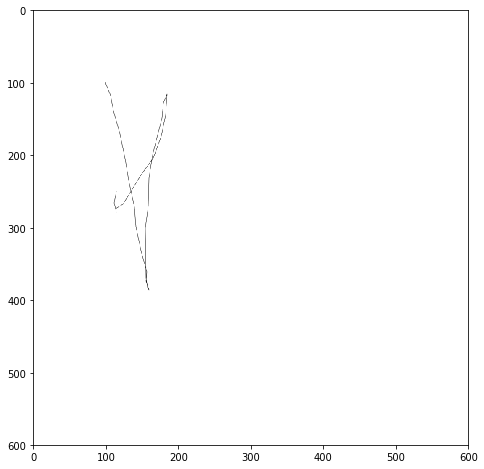

In [76]:
# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

img = cv2.imread('./ElementTree/1000.png')
plt.imshow(img.astype('uint8'))
plt.show()

In [65]:
S = []
count = 0
for image in data[1:5]:
    
    strokes_of_image = []
    for index, image_pixel in enumerate(image):
        strokes_of_everypixel_image = [0] * 2352
        if(image_pixel != 1.0):
            strokes_of_everypixel_image[index] = 1
        strokes_of_image.append(strokes_of_everypixel_image)
    S.append(strokes_of_image)
    count+=1
            
            

In [62]:
S = np.array(S, dtype="float")
count = 0
for p in S[9]:
    for q in p:
        if (q == 1):
            count+= 1
print(count)

IndexError: index 9 is out of bounds for axis 0 with size 9

In [ ]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
    labels, test_size=0.25, random_state=42)
 
# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

In [80]:
from keras import Model

In [84]:
model = Sequential()
input_shape = (28, 28, 3) #inputShape(height, width, depth)
model.add(Conv2D(20, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten(name='flatten_array'))
m2 = Model(inputs=model.input, outputs=model.get_layer('flatten_array').output)
Y = m2.predict(data)

In [85]:
Y

array([[0.18017112, 0.27492172, 0.03658094, ..., 0.13704403, 0.01077978,
        0.17757544],
       [0.1809405 , 0.28532004, 0.03517171, ..., 0.1527657 , 0.00902047,
        0.19100098],
       [0.18153399, 0.27667972, 0.03796345, ..., 0.13704403, 0.01077978,
        0.17757544],
       ...,
       [0.18017112, 0.27492172, 0.03658094, ..., 0.13704403, 0.01077978,
        0.17757544],
       [0.18354915, 0.2887067 , 0.04286911, ..., 0.13704403, 0.01077978,
        0.17757544],
       [0.1906369 , 0.2893132 , 0.04407135, ..., 0.13704403, 0.01077978,
        0.17757544]], dtype=float32)

In [89]:
Y.shape

(38, 1024)

In [90]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [4]:
#model.fit(data,
#          epochs=20,
#          batch_size=128)